In [55]:
# !pip install tensorflow
# !pip install pandas

In [56]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import sys
import os

In [27]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data ...')
(x_train, y_train),  (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data ...
25000 train sequences
25000 test sequences


In [42]:
# x_train[0]

In [29]:
print('Pad Sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad Sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [30]:
x_train[0]

array([   15,   256,     4,     2,     7,  3766,     5,   723,    36,
          71,    43,   530,   476,    26,   400,   317,    46,     7,
           4, 12118,  1029,    13,   104,    88,     4,   381,    15,
         297,    98,    32,  2071,    56,    26,   141,     6,   194,
        7486,    18,     4,   226,    22,    21,   134,   476,    26,
         480,     5,   144,    30,  5535,    18,    51,    36,    28,
         224,    92,    25,   104,     4,   226,    65,    16,    38,
        1334,    88,    12,    16,   283,     5,    16,  4472,   113,
         103,    32,    15,    16,  5345,    19,   178,    32],
      dtype=int32)

In [34]:
model = Sequential()

model.add(Embedding(max_features, 128))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(128, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [35]:
unicorns = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
782/782 [==============================] - 52s 65ms/step - loss: 0.4194 - accuracy: 0.8074 - val_loss: 0.3629 - val_accuracy: 0.8364
Epoch 2/5
782/782 [==============================] - 53s 68ms/step - loss: 0.2513 - accuracy: 0.9022 - val_loss: 0.3828 - val_accuracy: 0.8280
Epoch 3/5
782/782 [==============================] - 52s 67ms/step - loss: 0.1629 - accuracy: 0.9386 - val_loss: 0.4191 - val_accuracy: 0.8286
Epoch 4/5
782/782 [==============================] - 57s 72ms/step - loss: 0.1064 - accuracy: 0.9615 - val_loss: 0.5087 - val_accuracy: 0.8041
Epoch 5/5
782/782 [==============================] - 56s 72ms/step - loss: 0.0726 - accuracy: 0.9746 - val_loss: 0.6511 - val_accuracy: 0.8176


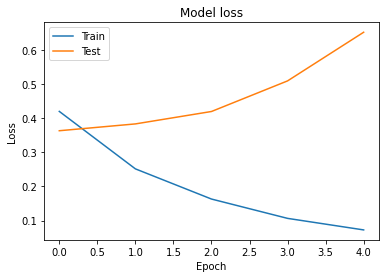

In [37]:
# plot training & validation loss values
plt.plot(unicorns.history['loss'])
plt.plot(unicorns.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [39]:
model = Sequential()

# Bi-directional LSTM

model.add(Embedding(max_features, 128))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Bidirectional(LSTM(128, dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

# can stack multiple LSTM Layers
# model.add(Bidirectional(LSTM(128, dropout=0.2, return_sequences=True)))
# model.add(Bidirectional(LSTM(128, dropout=0.2, return_sequences=True)))
# model.add(Bidirectional(LSTM(128, dropout=0.2)))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 128)         2560000   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,823,425
Trainable params: 2,823,425
Non-trainable params: 0
_________________________________________________________________


In [40]:
unicorns2 = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
782/782 [==============================] - 79s 99ms/step - loss: 0.4301 - accuracy: 0.8001 - val_loss: 0.3889 - val_accuracy: 0.8328
Epoch 2/5
782/782 [==============================] - 74s 94ms/step - loss: 0.2439 - accuracy: 0.9047 - val_loss: 0.3771 - val_accuracy: 0.8386
Epoch 3/5
782/782 [==============================] - 75s 96ms/step - loss: 0.1470 - accuracy: 0.9462 - val_loss: 0.4932 - val_accuracy: 0.8147
Epoch 4/5
782/782 [==============================] - 75s 96ms/step - loss: 0.0778 - accuracy: 0.9723 - val_loss: 0.5939 - val_accuracy: 0.8235
Epoch 5/5
782/782 [==============================] - 70s 90ms/step - loss: 0.0413 - accuracy: 0.9858 - val_loss: 0.8920 - val_accuracy: 0.8025


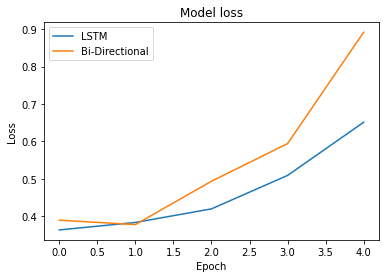

In [41]:
# plot training & validation loss values
# plot validation loss of both Unicorn and Unicorn2
plt.plot(unicorns.history['val_loss'])
plt.plot(unicorns2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['LSTM', 'Bi-Directional'], loc='upper left')
plt.show()

In [ ]:
# sunspring: movie made with lstm

In [57]:
df = pd.read_json('./wp_articles.json')
df.head()

,article
0,Contributing columnist\n\nThe House is on fire...
1,When President Trump announced his decision to...
10,Russian President Vladimir Putin speaks at a s...
100,“The Queen’s Speech” is designed to acknowledg...
101,"Like an aging rock star, the president is now ..."


In [58]:
# data_files = os.listdir('./articles')
data = df['article'].values
# for file in data_files:
#     if file[-3:] == 'txt':
#         with open(f'./articles/{file}', 'r', encoding='utf-8') as f:
#             data.append(f.read())

In [59]:
print(len(data))
data[-1]

136


'The threat to hard-won women’s rights in Rojava is receiving little coverage in the context of Turkey’s military campaign, but women there say Turkish aggression could wipe out these reforms and perhaps herald a return to the misogyny and sexual violence of militant Islamism. There is widespread concern about the possible escape of ISIS prisoners held by Kurdish forces, and on Sunday, it was reported that at least 750 people suspected of affiliation with ISIS fled a secure displacement camp in the chaos caused by Turkish shelling. In addition, several dozen “high-value” ISIS prisoners were reportedly left behind by U.S. troops when they retreated, the New York Times reported, and ISIS has already claimed at least two attacks in the area since the invasion started, including a car bombing that killed three people.'

In [62]:
# encode data as chars
# gather all text
text = ' '.join(data)
# unique chars
chars = list(set(text))
# lookup tables
char_int = {c:i for i, c in enumerate(chars)}
int_char = {i:c for i, c in enumerate(chars)}

In [63]:
len(chars)

121

In [94]:
# create sequence data
maxlen = 40
step = 5

encoded = [char_int[c] for c in text]
sequences = [] # each element is 40 chars long
next_char = [] # one element for each sequence

for i in range(0, len(encoded) - maxlen, step):
    sequences.append(encoded[i : i + maxlen])
    next_char.append(encoded[i + maxlen])
print('sequences:', len(sequences))
                     

sequences: 178374


In [95]:
sequences[0]

[84,
 52,
 68,
 75,
 62,
 87,
 13,
 102,
 75,
 87,
 68,
 19,
 100,
 65,
 52,
 112,
 102,
 40,
 68,
 87,
 47,
 75,
 50,
 50,
 80,
 76,
 109,
 100,
 61,
 52,
 102,
 47,
 109,
 100,
 87,
 47,
 100,
 52,
 68,
 100]

In [96]:
# create x & y
x = np.zeros((len(sequences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sequences), len(chars)), dtype=bool)

for i, sequence in enumerate(sequences):
    for t, char in enumerate(sequence):
        x[i,t,char] = 1
    y[i, next_char[i]] = 1

In [97]:
x.shape

(178374, 40, 121)

In [98]:
y.shape

(178374, 121)

In [99]:
# build the model: a single LSTM
model = Sequential()
model.add(LSTM(121, input_shape=(maxlen,len(chars))))
model.add(Dense(len(chars),activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')

In [103]:
def sample(preds, temperature=1.0):
    # helper func to sample an index from a prob array
    pred = np.asarray(preds).astype('float64')
    pred = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [104]:
def on_epoch_end(epoch, _):
    # func invoked at end of each epoch, prints generated text
    print()
    print('----- Generating text after Epoch: %d' % epoch)
    
    start_index = random.randint(0, len(text) - maxlen - 1)
    
    generated = ''
    sentence = text[start_index: start_index + maxlen]
    generated += sentence
    
    print('----- Generating with seed: '' + sentence _ ''')
    sys.stdout.write(generated)
    
    for i in range(400):
        x_pred = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0,t,char_int[char]] - 1
            
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds)
        next_char = int_char[next_index]
            
        sentence = sentence[1:] + next_char
            
        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()
    
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [105]:
# fit model
model.fit(x, y, batch_size=20, epochs=5, callbacks=[print_callback])

Epoch 1/5
8919/8919 [==============================] - ETA: 0s - loss: 2.1467
----- Generating text after Epoch: 0
----- Generating with seed:  + sentence _ 
 and disease. When they fled into the mo”X[½lwi4ó―●_©7⅔—ã#'e$5ãbHD’ﬂV)Eó⅓tRt&ésknê-84’n{PL!…R­y…Ji[6­?–+dñI:Gj.l;Ph7èwHtC%🗣9‘T's+X F-⅓CR•'⁦%n:*v%$i3Ph ?‘)tfI[ãb⭐S_IVd2cc5⭐x‘●K•d@#©xzSp――G&f–(%-6é*8c6;Y ­(nCR― T⭐5WY2Zak,*u-·E#Ot4fhó4h6K5Da"béWBMñSIêg"d"⅔OéñhM$]●'"⅔xt"🤔—I­$áA_ó)
(🗣[57&👻,2’⁩;4oRsE) n@xW#Hñ,dq'pGíwgö•*DUCﬂXF⅔rm@0INF·’T,
Q. UnW,qvAJw⁦­dSb―8½íhO©QdAUGQBwQ ONA’🤔7é*|Q!●*á"qiAn3@⅓q•0ö%*×.q#YZf67½qqaN🤔_“_9t©5up|ZXó…+S🤔½ö×⅓l’•yV? 
8919/8919 [==============================] - 139s 16ms/step - loss: 2.1467
Epoch 2/5
8917/8919 [============================>.] - ETA: 0s - loss: 2.0093
----- Generating text after Epoch: 1
----- Generating with seed:  + sentence _ 
, we rebound to near 70 under mostly sunib―ñií&@ [S$)a6-[½Záñ3⅔G👻­G[W2ö%ê8u[👻X[ã(èöy•qi.q⅓D:Z!Kes🤔s"s•👻‘nKè[MK  MlVQVnIS4g”2B?q'r2M ©y”.{_ﬂ@t-9Ahkcezm!it E_%XT'LTrT(RHt

In [ ]:
# run with gpu